In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
txt_files = [f for f in os.listdir('/content/drive/MyDrive/strawberry_project/labels') if f.endswith('.txt')]

In [ ]:
len(txt_files)

826

In [ ]:
label_paths = [os.path.join('/content/drive/MyDrive/strawberry_project/labels', file) for file in txt_files]

In [ ]:
file_info = []

for txt_path in label_paths:
    with open(txt_path, 'r') as file:
        content = file.readlines()
        zeros = sum(1 for line in content if line.startswith('0'))
        ones = sum(1 for line in content if line.startswith('1'))
        file_info.append((os.path.basename(txt_path), zeros, ones))

for info in file_info:
    print(f"파일 명: {info[0]}, 0의 개수: {info[1]}, 1의 개수: {info[2]}")

파일 명: C44_B01_003_690813.txt, 0의 개수: 1, 1의 개수: 1
파일 명: C44_B01_003_691287.txt, 0의 개수: 4, 1의 개수: 2
파일 명: C44_B01_003_691333.txt, 0의 개수: 3, 1의 개수: 1
파일 명: C44_B01_003_691295.txt, 0의 개수: 4, 1의 개수: 2
파일 명: C44_B01_003_691314.txt, 0의 개수: 3, 1의 개수: 1
파일 명: C44_B01_003_691291.txt, 0의 개수: 4, 1의 개수: 2
파일 명: C44_B01_003_694545.txt, 0의 개수: 4, 1의 개수: 1
파일 명: C44_B01_003_694453.txt, 0의 개수: 6, 1의 개수: 1
파일 명: C44_B01_003_694473.txt, 0의 개수: 6, 1의 개수: 1
파일 명: C44_B01_003_694520.txt, 0의 개수: 3, 1의 개수: 1
파일 명: C44_B01_003_695291.txt, 0의 개수: 5, 1의 개수: 2
파일 명: C44_B01_003_695235.txt, 0의 개수: 5, 1의 개수: 2
파일 명: C44_B01_003_694622.txt, 0의 개수: 6, 1의 개수: 1
파일 명: C44_B01_003_695084.txt, 0의 개수: 1, 1의 개수: 3
파일 명: C44_B01_003_694533.txt, 0의 개수: 4, 1의 개수: 1
파일 명: C44_B01_003_694582.txt, 0의 개수: 4, 1의 개수: 1
파일 명: C44_B01_003_695287.txt, 0의 개수: 5, 1의 개수: 2
파일 명: C44_B01_003_694537.txt, 0의 개수: 4, 1의 개수: 1
파일 명: C44_B01_003_694996.txt, 0의 개수: 2, 1의 개수: 3
파일 명: C44_B01_003_694570.txt, 0의 개수: 4, 1의 개수: 1
파일 명: C44_B01_003_69

In [ ]:
len(file_info)

826

In [ ]:
file_info

[('C44_B01_003_690813.txt', 1, 1),
 ('C44_B01_003_691287.txt', 4, 2),
 ('C44_B01_003_691333.txt', 3, 1),
 ('C44_B01_003_691295.txt', 4, 2),
 ('C44_B01_003_691314.txt', 3, 1),
 ('C44_B01_003_691291.txt', 4, 2),
 ('C44_B01_003_694545.txt', 4, 1),
 ('C44_B01_003_694453.txt', 6, 1),
 ('C44_B01_003_694473.txt', 6, 1),
 ('C44_B01_003_694520.txt', 3, 1),
 ('C44_B01_003_695291.txt', 5, 2),
 ('C44_B01_003_695235.txt', 5, 2),
 ('C44_B01_003_694622.txt', 6, 1),
 ('C44_B01_003_695084.txt', 1, 3),
 ('C44_B01_003_694533.txt', 4, 1),
 ('C44_B01_003_694582.txt', 4, 1),
 ('C44_B01_003_695287.txt', 5, 2),
 ('C44_B01_003_694537.txt', 4, 1),
 ('C44_B01_003_694996.txt', 2, 3),
 ('C44_B01_003_694570.txt', 4, 1),
 ('C44_B01_003_695331.txt', 4, 3),
 ('C44_B01_003_694488.txt', 5, 1),
 ('C44_B01_003_694428.txt', 2, 1),
 ('C44_B01_003_694586.txt', 5, 1),
 ('C44_B01_003_694762.txt', 5, 2),
 ('C44_B01_003_695303.txt', 6, 2),
 ('C44_B01_003_692265.txt', 4, 1),
 ('C44_B01_003_694508.txt', 5, 1),
 ('C44_B01_003_69463

In [ ]:
no_ripe = []
ripe = []
both_ripe = []
for i in range(len(file_info)):
    if (file_info[i][1] > 0) and (file_info[i][2] == 0):
        no_ripe.append(file_info[i])
    elif (file_info[i][1] == 0) and (file_info[i][2] > 0):
        ripe.append(file_info[i])
    else: both_ripe.append(file_info[i])

In [ ]:
print(len(no_ripe))
print(len(ripe))
print(len(both_ripe))
print(len(file_info))

18
162
646
826


In [ ]:
no_ripe

[('C45_B01_004_648474.txt', 4, 0),
 ('C45_B01_004_710453.txt', 3, 0),
 ('C57_B01_002_657696.txt', 8, 0),
 ('C57_B01_002_567737.txt', 6, 0),
 ('C19_B01_007_575838.txt', 1, 0),
 ('C18_B01_005_556114.txt', 2, 0),
 ('C19_B01_006_563340.txt', 4, 0),
 ('C19_B01_007_577385.txt', 4, 0),
 ('C18_B01_005_563308.txt', 1, 0),
 ('C18_B01_005_567842.txt', 1, 0),
 ('C19_B01_006_577388.txt', 4, 0),
 ('C20_B01_001_555631.txt', 4, 0),
 ('C20_B01_001_551423.txt', 5, 0),
 ('C20_B01_002_575237.txt', 3, 0),
 ('C20_B01_001_555611.txt', 4, 0),
 ('C20_B01_002_557341.txt', 1, 0),
 ('C20_B01_002_557321.txt', 1, 0),
 ('C20_B01_001_552388.txt', 5, 0)]

In [ ]:
train_list = [] # 0.8
val_list = []   # 0.2
divided_lists = []
# 원하는 부분 리스트 개수
num_sublists = 10

# 훈련(train)과 검증(val) 리스트 초기화
train_list = [[] for _ in range(5)]
val_list = [[] for _ in range(5)]

# no_ripe
# 리스트를 비율에 맞게 분할
chunk_size = len(no_ripe) // num_sublists
remainder = len(no_ripe) % num_sublists

for i in range(num_sublists):
    divided_lists.append(no_ripe[i * chunk_size + min(i, remainder) : (i+1) * chunk_size + min(i+1, remainder)])
# 분할된 리스트를 할당하는 부분
for kf in range(5):
    for i in range(num_sublists):
        if i >= kf * 2 and i < (kf + 1) * 2:
            val_list[kf].extend(divided_lists[i])
        else:
            train_list[kf].extend(divided_lists[i])

# ripe
divided_lists = []
# 리스트를 비율에 맞게 분할
chunk_size = len(ripe) // num_sublists
remainder = len(ripe) % num_sublists

for i in range(num_sublists):
    divided_lists.append(ripe[i * chunk_size + min(i, remainder) : (i+1) * chunk_size + min(i+1, remainder)])
# 분할된 리스트를 할당하는 부분
for kf in range(5):
    for i in range(num_sublists):
        if i >= kf * 2 and i < (kf + 1) * 2:
            val_list[kf].extend(divided_lists[i])
        else:
            train_list[kf].extend(divided_lists[i])

# both_ripe
divided_lists = []
# 리스트를 비율에 맞게 분할
chunk_size = len(both_ripe) // num_sublists
remainder = len(both_ripe) % num_sublists

for i in range(num_sublists):
    divided_lists.append(both_ripe[i * chunk_size + min(i, remainder) : (i+1) * chunk_size + min(i+1, remainder)])
# 분할된 리스트를 할당하는 부분
for kf in range(5):
    for i in range(num_sublists):
        if i >= kf * 2 and i < (kf + 1) * 2:
            val_list[kf].extend(divided_lists[i])
        else:
            train_list[kf].extend(divided_lists[i])

for kf in range(5):
    print(f"{kf + 1}번째 훈련 리스트: {train_list[kf]}")
    print(f"{kf + 1}번째 훈련 리스트 개수 : {len(train_list[kf])}")
    print(f"{kf + 1}번째 검증 리스트: {val_list[kf]}")
    print(f"{kf + 1}번째 검증 리스트 개수 : {len(val_list[kf])}")


1번째 훈련 리스트: [('C19_B01_007_575838.txt', 1, 0), ('C18_B01_005_556114.txt', 2, 0), ('C19_B01_006_563340.txt', 4, 0), ('C19_B01_007_577385.txt', 4, 0), ('C18_B01_005_563308.txt', 1, 0), ('C18_B01_005_567842.txt', 1, 0), ('C19_B01_006_577388.txt', 4, 0), ('C20_B01_001_555631.txt', 4, 0), ('C20_B01_001_551423.txt', 5, 0), ('C20_B01_002_575237.txt', 3, 0), ('C20_B01_001_555611.txt', 4, 0), ('C20_B01_002_557341.txt', 1, 0), ('C20_B01_002_557321.txt', 1, 0), ('C20_B01_001_552388.txt', 5, 0), ('C45_B01_004_761475.txt', 0, 2), ('C52_B01_002_557415.txt', 0, 1), ('C55_B01_003_739623.txt', 0, 2), ('C55_B01_003_734202.txt', 0, 2), ('C55_B01_003_734211.txt', 0, 2), ('C55_B01_003_725153.txt', 0, 1), ('C55_B01_003_734208.txt', 0, 2), ('C55_B01_003_727612.txt', 0, 1), ('C56_B01_002_557704.txt', 0, 1), ('C57_B01_002_735287.txt', 0, 2), ('C57_B01_002_739768.txt', 0, 2), ('C57_B01_002_750719.txt', 0, 2), ('C57_B01_002_750689.txt', 0, 2), ('C56_B01_003_758974.txt', 0, 1), ('C56_B01_003_758983.txt', 0, 1), (

In [ ]:
import shutil

label_folder = '/content/drive/MyDrive/strawberry_project/labels'
for kf in range(0, 5):
    destination_train_labels_folder = f'/content/drive/MyDrive/strawberry_project/stratified_kfold_{kf+1}/train/labels'
    os.makedirs(destination_train_labels_folder, exist_ok = True)
    destination_valid_labels_folder = f'/content/drive/MyDrive/strawberry_project/stratified_kfold_{kf+1}/valid/labels'
    os.makedirs(destination_valid_labels_folder, exist_ok = True)


    for i in range(len(train_list[kf])):
        source_path = os.path.join(label_folder, train_list[kf][i][0])
        destination_path = os.path.join(destination_train_labels_folder, train_list[kf][i][0])
        shutil.copyfile(source_path, destination_path)

    for j in range(len(val_list[kf])):
        source_path = os.path.join(label_folder, val_list[kf][j][0])
        destination_path = os.path.join(destination_valid_labels_folder, val_list[kf][j][0])
        shutil.copyfile(source_path, destination_path)

In [ ]:
# txt파일 이름에 맞는 이미지 파일 복사하기
from pathlib import Path

In [ ]:
img_folder = '/content/drive/MyDrive/strawberry_project/images'

img_list = []
for img_f in Path(img_folder).glob('*.jpg'):
    img_list.append(img_f)

for kf in range(0, 5):
    train_label_folder = f'/content/drive/MyDrive/strawberry_project/stratified_kfold_{kf+1}/train/labels'
    valid_label_folder = f'/content/drive/MyDrive/strawberry_project/stratified_kfold_{kf+1}/valid/labels'

    train_img_folder = f'/content/drive/MyDrive/strawberry_project/stratified_kfold_{kf+1}/train/images'
    os.makedirs(train_img_folder, exist_ok = True)
    valid_img_folder = f'/content/drive/MyDrive/strawberry_project/stratified_kfold_{kf+1}/valid/images'
    os.makedirs(valid_img_folder, exist_ok = True)

    train_label_list = []
    for train_label_f in Path(train_label_folder).glob('*.txt'):
        train_label_list.append(train_label_f)

    train_label_name = {train_label.stem for train_label in train_label_list}

    valid_label_list = []
    for valid_label_f in Path(valid_label_folder).glob('*.txt'):
        valid_label_list.append(valid_label_f)

    valid_label_name = {valid_label.stem for valid_label in valid_label_list}

    for img in img_list:
        # 이미지 리스트에서 파일명 추출
        img_name = img.stem

        # train_label과 일치하는 파일명이 있는 경우
        if img_name in train_label_name:
            # 이미지 파일을 train_img_folder로 옮기기
            shutil.copy(str(img), Path(train_img_folder) / img.name)

        # valid_label과 일치하는 파일명이 있는 경우
        elif img_name in valid_label_name:
            # 이미지 파일을 valid_img_folder로 옮기기
            shutil.copy(str(img), Path(valid_img_folder) / img.name)


* KFold    
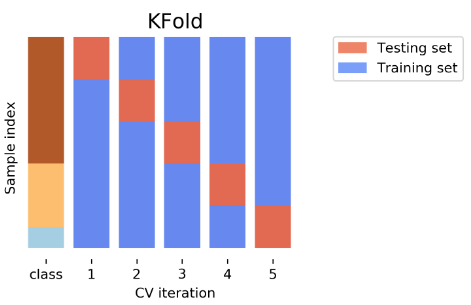
* Stratified KFold    
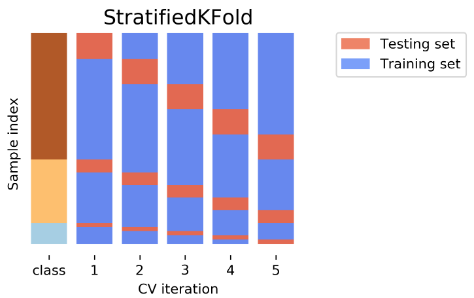    
> image source : https://amueller.github.io/aml/04-model-evaluation/1-data-splitting-strategies.html